In [3]:
#!/usr/bin/env python3
# Samantha Hong sh974
# ECE 4250 Assignment 1
import numpy as np
import math
import time
import scipy
import scipy.io as sio
import scipy.io.wavfile
from scipy import signal
import matplotlib.pyplot as plt


In [4]:
""" 1. CONVOLUTIONS """
""" PART A """
x = np.array([3, 4, 1, 2, 5, 6, 7, 8, 2, 4])
h = np.array([1.0/4, 1.0/4, 1.0/4])
conv_size = x.size + h.size - 1
        
def conv(x, h):
    conv_size = x.size + h.size - 1
    y = np.zeros(conv_size)
    for i in range(h.size):
        for j in range(x.size):
            y[j + i] = y[j + i] + h.item(i) * x.item(j)
    
    return y

y = conv(x, h)
print(y)

[0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]


In [5]:
""" PART C """
# zero padding 
x_1 = np.concatenate([np.zeros(h.size - 1), x, np.zeros(h.size - 1)])
y_1 = np.zeros(x_1.size)

for i in range(conv_size):
    y_1[i] = (1.0/4)*(x_1[i] + x_1[i + 1] + x_1[i + 2])
    
# resize convolution output
y_1 = np.resize(y_1, (1, conv_size))

print(y_1)


[[0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]]


In [6]:
""" PART D """
# resize np array
x_2 = np.array([])
h_2 = np.array([])

# replicate x and h by 100 times
for i in range(100):
    x_2 = np.concatenate([x_2, x])
    h_2 = np.concatenate([h_2, h])
    
# O(n^2)
conv_size_2 = x_2.size + h_2.size - 1
reg = np.zeros(conv_size_2)
starttime = time.time()
for i in range(h_2.size):
    for j in range(x_2.size):
        reg[j + i] = reg[j + i] + h_2.item(i) * x_2.item(j)
regtime = time.time() - starttime

# O(n)
x_3 = np.concatenate([np.zeros(h_2.size - 1), x_2, np.zeros(h_2.size - 1)])
eff = np.zeros(x_3.size)
starttime = time.time()
for i in range(conv_size_2):
    eff[i] = (1/4)*(x_3[i] + x_3[i + 1] + x_3[i + 2])    
eff = np.resize(eff, (1, conv_size_2))
efftime = time.time() - starttime

print(['regtime ', regtime])
print(['efftime ', efftime])



['regtime ', 0.2549169063568115]
['efftime ', 0.0015919208526611328]


/usr/local/lib/python2.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/usr/local/lib/python2.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


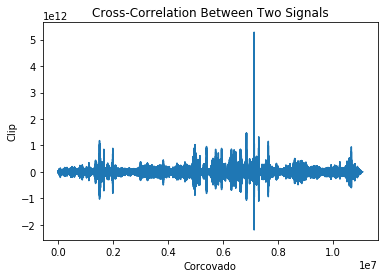

('corcovado rate: ', 44100)
('clip rate: ', 44100)
('peak: ', 7130116)
('time of clip in corcovado: ', 161)


In [7]:
""" 2. MATCHED FILTERS WITH CROSS-CORRELATION """
# reading in .wav files
corcovado_rate, corcovado_data = scipy.io.wavfile.read('/Users/samanthahong/Desktop/2019-2020/ECE4250/HW1-Files/Corcovado.wav')
clip_rate, clip_data = sio.wavfile.read('./HW1-Files/clip.wav')

# converting to float and subtracting the default padding 
corcovado_data = corcovado_data.astype(float)
corr = signal.correlate(corcovado_data, clip_data, mode = 'valid')

plt.plot(corr)
plt.title('Cross-Correlation Between Two Signals')
plt.xlabel('Corcovado')
plt.ylabel('Clip')
plt.savefig('x-correlation.png', bbox_inches='tight')
plt.show()

print("corcovado rate: ", corcovado_rate)
print("clip rate: ", clip_rate)
print("peak: ", scipy.argmax(corr))
print("time of clip in corcovado: ", scipy.argmax(corr)/corcovado_rate)


In [8]:
""" 3. FOURIER SERIES """
""" PART A """
t = np.arange(0, 1, 1./1000)
K = 0
f = 2

In [9]:
""" PART B """
def calculateY(K, t, f):
    y = 0
    for k in range(1, K + 1):
        y = y + np.sin(2 * math.pi * (2 * k - 1) * f * t) / (2 * k - 1)
    return y

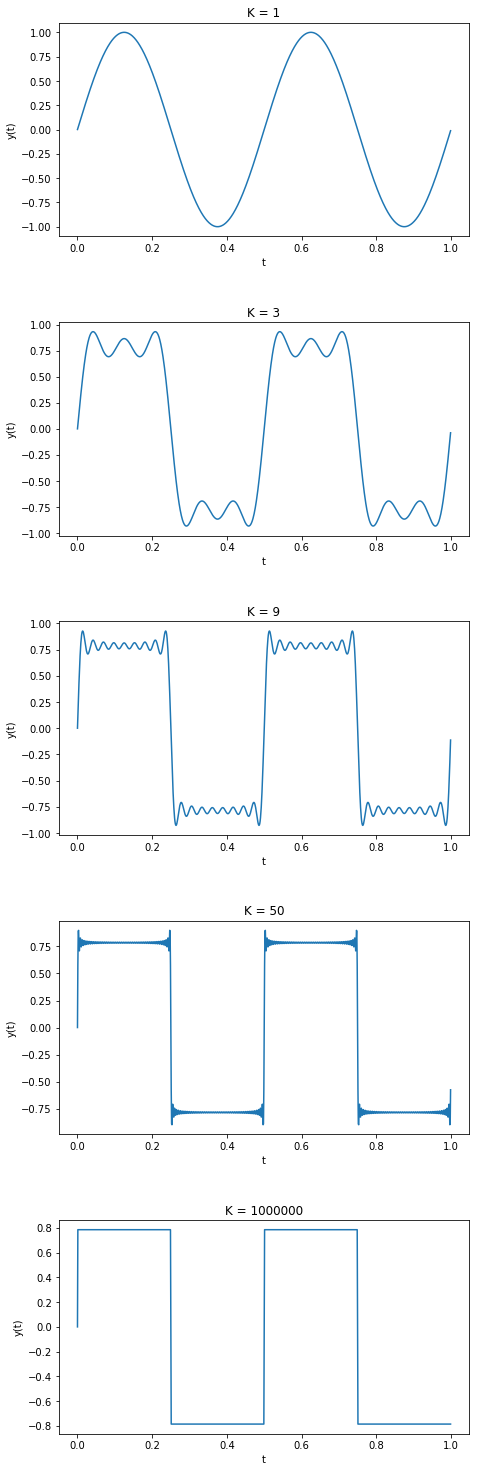

In [10]:
""" PART C """
p1 = plt.subplot(511)
K = 1
y_c = calculateY(K, t, f)
p1.plot(t, y_c)
plt.title('K = 1')
plt.xlabel('t')
plt.ylabel('y(t)')

p2 = plt.subplot(512)
K = 3
y_d = calculateY(K, t, f)
p2.plot(t, y_d)
plt.title('K = 3')
plt.xlabel('t')
plt.ylabel('y(t)')

p3 = plt.subplot(513)
K = 9
y_d = calculateY(K, t, f)
p3.plot(t, y_d)
plt.title('K = 9')
plt.xlabel('t')
plt.ylabel('y(t)')

p4 = plt.subplot(514)
K = 50
y_d = calculateY(K, t, f)
p4.plot(t, y_d)
plt.title('K = 50')
plt.xlabel('t')
plt.ylabel('y(t)')

p5 = plt.subplot(515)
K = 1000000
y_d = calculateY(K, t, f)
p5.plot(t, y_d)
plt.title('K = 1000000')
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplots_adjust(top=5, bottom=0.1, left=0.05, right=1, hspace=0.4, wspace=0.5)
plt.savefig('plots.png', bbox_inches='tight')

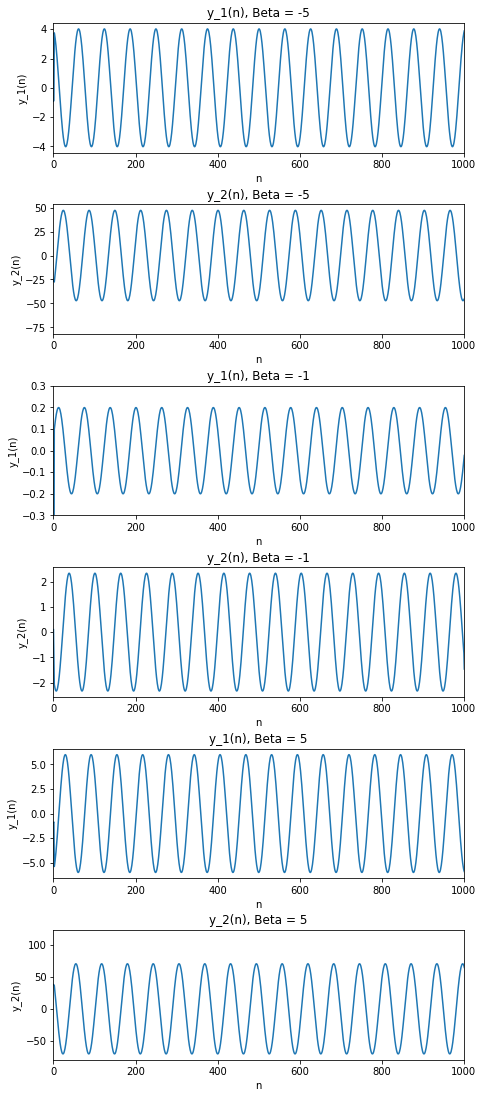

In [13]:
""" 4. PROGRAMMING A LTI SYSTEM """
""" PART A """
n = np.arange(-200, 1001)
x = np.sin(0.1 * n)


def LTI(Beta):
    h1 = Beta * signal.unit_impulse(len(n),2)
    
    y_1 = conv(x, h1) + np.concatenate([x,np.zeros(1200)])

    h2 = np.zeros(2201)
    for i in range(201):
        h2[i] = -1
    
    y_2 = conv(h2, y_1)
    
    return y_1, y_2[200:]



   
q1 = plt.subplot(611)
Beta = -5
y_1, y_2 = LTI(Beta)
q1.plot(y_1)
plt.title('y_1(n), Beta = -5')
plt.xlabel('n')
plt.ylabel('y_1(n)')
plt.xlim((0, 1000))

q2 = plt.subplot(612)
q2.plot(y_2)
plt.title('y_2(n), Beta = -5')
plt.xlabel('n')
plt.ylabel('y_2(n)')
plt.xlim((0, 1000))

q3 = plt.subplot(613)
Beta = -1
y_1, y_2 = LTI(Beta)
q3.plot(y_1)
plt.title('y_1(n), Beta = -1')
plt.xlabel('n')
plt.ylabel('y_1(n)')
plt.xlim((0, 1000))
plt.ylim((-0.3, 0.3))

q4 = plt.subplot(614)
q4.plot(y_2)
plt.title('y_2(n), Beta = -1')
plt.xlabel('n')
plt.ylabel('y_2(n)')
plt.xlim((0, 1000))

q5 = plt.subplot(615)
Beta = 5
y_1, y_2 = LTI(Beta)
q5.plot(y_1)
plt.title('y_1(n), Beta = 5')
plt.xlabel('n')
plt.ylabel('y_1(n)')
plt.xlim((0, 1000))

q6 = plt.subplot(616)
q6.plot(y_2)
plt.title('y_2(n), Beta = 5')
plt.xlabel('n')
plt.ylabel('y_2(n)')
plt.xlim((0, 1000))


plt.subplots_adjust(top=4, bottom=0.4, left=0.05, right=1, hspace=0.4, wspace=0.5)
plt.savefig('lti.png', bbox_inches='tight')